In [1]:
import numpy as np
import pandas as pd


In [2]:
crypto_df = pd.read_csv('crypto_data.csv')

In [3]:
crypto_df.shape

(1252, 7)

In [4]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [5]:
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
crypto_df = crypto_df.dropna()
crypto_df.shape

(744, 7)

In [7]:
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000


In [8]:
#Drop IsTrading column
crypto_df = crypto_df.drop(["IsTrading"], axis="columns")

In [9]:
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [10]:
#Drop TotalCoinsMined is less than zero
crypto_df.shape
total_mined_pos = crypto_df[crypto_df['TotalCoinsMined']>0]
total_mined_pos.shape



(577, 6)

In [11]:
#Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.
crypto_df_ready = total_mined_pos.drop(["CoinName"], axis="columns")
crypto_df_ready.shape

(577, 5)

In [12]:
#Convert the remaining features with text values, Algorithm and ProofType, into numerical data. 
#To accomplish this task, use Pandas to create dummy variables.
crypto_df_dummies = pd.get_dummies(crypto_df_ready['Algorithm'], ['ProofType'], ['CoinName'])


In [13]:
crypto_df_dummies

,['ProofType']['CoinName']1GB AES Pattern Search,['ProofType']['CoinName']536,['ProofType']['CoinName']Argon2d,['ProofType']['CoinName']BLAKE256,['ProofType']['CoinName']Blake,['ProofType']['CoinName']Blake2S,['ProofType']['CoinName']Blake2b,['ProofType']['CoinName']C11,['ProofType']['CoinName']Cloverhash,['ProofType']['CoinName']Counterparty,...,['ProofType']['CoinName']Tribus,['ProofType']['CoinName']VBFT,['ProofType']['CoinName']VeChainThor Authority,['ProofType']['CoinName']X11,['ProofType']['CoinName']X11GOST,['ProofType']['CoinName']X13,['ProofType']['CoinName']X14,['ProofType']['CoinName']X15,['ProofType']['CoinName']X16R,['ProofType']['CoinName']XEVAN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
crypto_array = crypto_df_dummies.to_numpy()
crypto_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(crypto_array)
StandardScaler(copy=True, with_mean=True, with_std=True)
crypto_scaled = scaler.transform(crypto_array)


<function matplotlib.pyplot.show(close=None, block=None)>

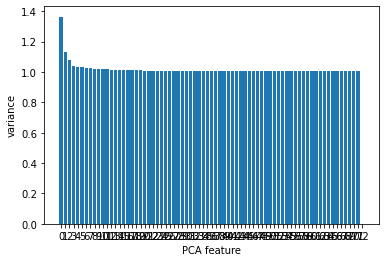

In [16]:
 #Perform dimensionality reduction with PCA/Principal Component Analysis
    
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
        
#initialize the PCA model
#create a PCA instance
model= PCA()

#fit model to crypto_scaled
model.fit(crypto_scaled)

features = range(model.n_components_)
plt.bar(features,model.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show



    

C:\Users\jenny\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


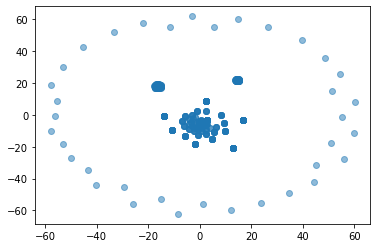

In [17]:
#Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. 
#In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation.
#Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.
from sklearn.manifold import TSNE

#create TSNE instance
model = TSNE(learning_rate=50)

#apply fit_transform to normalized_movements: tnse_features
tsne_features = model.fit_transform(crypto_scaled)

#Select the 0th feature
xs = tsne_features[:,0]

#Select the 1th feature
ys = tsne_features[:,1]

#create scatter plot
plt.scatter(xs, ys, alpha=0.5)

In [20]:
#Create an elbow plot to identify the best number of clusters. 
#Use a for-loop to determine the inertia for each k between 1 through 10.
#Determine, if possible, where the elbow of the plot is, and at which value of k it

#elbow plot
from sklearn.cluster import KMeans

inertia = []
k=list(range(1,10))

#Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_scaled)
    inertia.append(km.inertia_)
   


C:\Users\jenny\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [21]:
#create elbow curve
elbow_data = {"k": k, "inertia":inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,42121.000000
1,2,41449.063484
2,3,40859.533121
3,4,40219.486674
4,5,39617.553516


<function matplotlib.pyplot.show(close=None, block=None)>

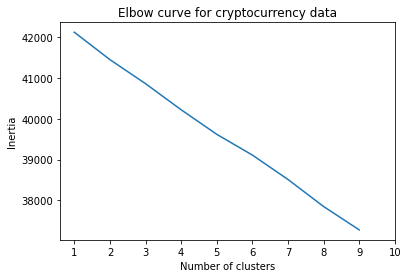

In [22]:
#plot the curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for cryptocurrency data')
plt.show

In [19]:
#Based on the T-SNE plot it appears that there is one large cluster of cryptocurrencies and 2 smaller ones. 